In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
from pathlib import Path
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sys.path = ['/N/project/waveform_mortality/rmahawar/waveform/'] + sys.path

In [4]:
from utils.data_utils import *

In [5]:
mortality = pd.read_csv('waveform_mortality.csv')
mortality.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,deathtime,DEATH_T0
0,29299,206514,2192-12-06T20:06:11,2192-12-11T16:43:54,NaN,999999
1,27338,230135,2125-01-05T23:31:46,2125-01-18T15:56:59,2125-01-18T15:12:00,304
2,30509,251795,2113-07-21T19:04:23,2113-07-28T21:21:38,NaN,999999
3,32701,260388,2139-04-01T16:19:52,2139-04-07T18:04:56,NaN,999999
4,32420,291291,2110-06-27T15:56:30,2110-07-01T18:52:22,2110-07-04T12:00:00,165


In [6]:
len(mortality)

10257

### Distribution of in hospital death time

In [25]:
house_deaths = np.asarray(mortality['DEATH_T0'][mortality['DEATH_T0'] < 999999].values.tolist())

In [26]:
max(house_deaths), min(house_deaths)

(2411, 1)

In [61]:
# 1-12 cohort
len(house_deaths[(house_deaths <= 13) & (house_deaths > 1)])

134

In [62]:
# 1-24 cohort
len(house_deaths[(house_deaths <= 25) & (house_deaths > 1)])

240

In [63]:
# 1-48 cohort
len(house_deaths[(house_deaths <= 49) & (house_deaths > 1)])

423

In [64]:
# 1-72 cohort
len(house_deaths[(house_deaths <= 73) & (house_deaths > 1)])

553

In [55]:
# 6-hr cohort
len(house_deaths[(house_deaths <= 18) & (house_deaths > 6)])

105

In [54]:
# 12-hr cohort
len(house_deaths[(house_deaths <= 24) & (house_deaths > 12)])

109

In [56]:
# 12-hr cohort
len(house_deaths[(house_deaths <= 36) & (house_deaths > 24)])

87

In [69]:
hours = [i*12 for i in range(1, 21)]
deaths_6= []
for hrs in hours:
    deaths = len(house_deaths[(house_deaths > hrs - 12) & (house_deaths <= hrs)])
    deaths_6.append(deaths)
    print(f'Pateints died between {hrs- 12} and {hrs} hours: {deaths}')

Pateints died between 0 and 12 hours: 127
Pateints died between 12 and 24 hours: 109
Pateints died between 24 and 36 hours: 87
Pateints died between 36 and 48 hours: 95
Pateints died between 48 and 60 hours: 73
Pateints died between 60 and 72 hours: 58
Pateints died between 72 and 84 hours: 57
Pateints died between 84 and 96 hours: 39
Pateints died between 96 and 108 hours: 51
Pateints died between 108 and 120 hours: 46
Pateints died between 120 and 132 hours: 49
Pateints died between 132 and 144 hours: 30
Pateints died between 144 and 156 hours: 48
Pateints died between 156 and 168 hours: 25
Pateints died between 168 and 180 hours: 21
Pateints died between 180 and 192 hours: 43
Pateints died between 192 and 204 hours: 22
Pateints died between 204 and 216 hours: 32
Pateints died between 216 and 228 hours: 22
Pateints died between 228 and 240 hours: 26


([<matplotlib.axis.XTick at 0x7f3f38797160>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

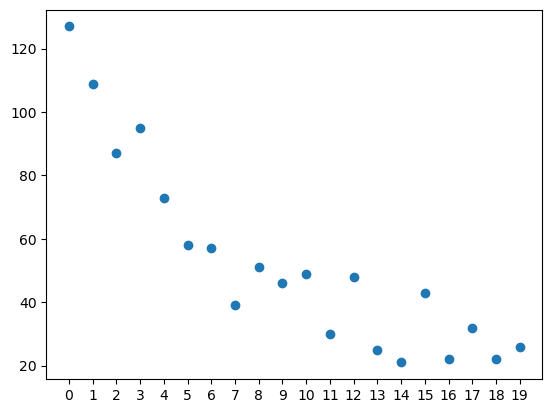

In [68]:
plt.scatter(x = range(20), y = deaths_6)
plt.xticks(range(20))

(array([83., 62., 62., 57., 54., 51., 64., 42., 43., 31.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

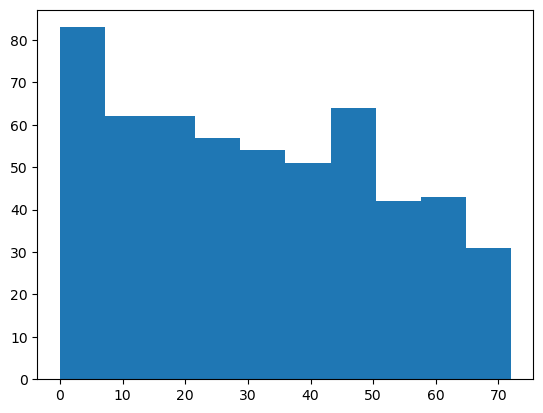

In [50]:
plt.hist(house_deaths, range=(0, 72), bins= 10)
# plt.xlim((0, 200))

### MV Patient Selection

In [8]:
mv = pd.read_csv('patients_with_mv.csv')
print(f'{len(mv)}')
mv.head()

23258


,SUBJECT_ID
0,30887
1,94023
2,79575
3,68391
4,88166


In [9]:
np.array(mv.values.tolist())[:, 0].shape

(23258,)

In [35]:
len(pd.unique(mv['SUBJECT_ID'])), len(pd.unique(mortality['SUBJECT_ID'])), len(mortality)

(23258, 10257, 10257)

In [32]:
mv_data= mortality[mortality['SUBJECT_ID'].isin(np.array(mv.values.tolist())[:, 0])]

In [37]:
mortality[mortality['SUBJECT_ID'].isin([1, 2, 33])]

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,deathtime,DEATH_T0
448,33,296681,2116-12-23T22:31:53,2116-12-25T11:49:55,NaN,999999


In [33]:
len(mv_data)

6026

In [12]:
mv_data.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,deathtime,DEATH_T0
0,29299,206514,2192-12-06T20:06:11,2192-12-11T16:43:54,NaN,999999
1,27338,230135,2125-01-05T23:31:46,2125-01-18T15:56:59,2125-01-18T15:12:00,304
2,30509,251795,2113-07-21T19:04:23,2113-07-28T21:21:38,NaN,999999
4,32420,291291,2110-06-27T15:56:30,2110-07-01T18:52:22,2110-07-04T12:00:00,165
5,11032,214328,2186-05-01T05:18:46,2186-05-04T21:48:59,NaN,999999


In [13]:
len(mv_data[mv_data['DEATH_T0'] < 99999])

1193

### MV Patients Death Distribution

In [14]:
house_deaths = np.array(mv_data['DEATH_T0'].values.tolist())

hours = [i*6 for i in range(21)]
deaths_6= []
for hrs in hours:
    deaths = len(house_deaths[(house_deaths > hrs - 6) & (house_deaths <= hrs)])
    deaths_6.append(deaths)
    # print(f'Pateints died between {hrs- 12} and {hrs} hours: {deaths}')

Text(0, 0.5, 'Deaths')

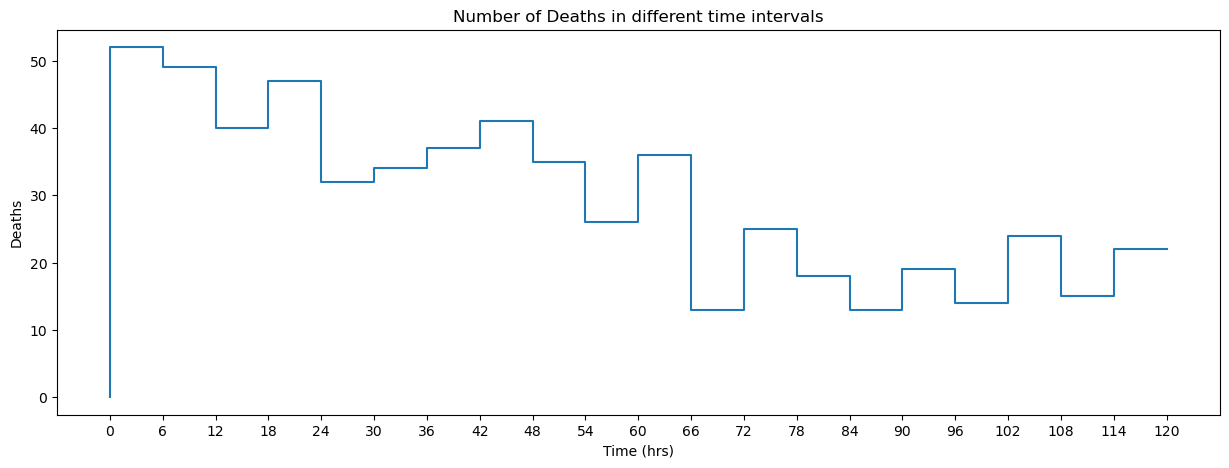

In [15]:
plt.figure(figsize= (15, 5))
plt.step(x= hours, y= deaths_6)
plt.xticks(hours)
plt.title('Number of Deaths in different time intervals')
plt.xlabel('Time (hrs)')
plt.ylabel('Deaths')

In [16]:
sum(deaths_6)

592

In [18]:
mv_6 = create_snapshot(mv_data, 6, 12)

In [19]:
len(mv_6[mv_6['label'] == 1])

49

In [20]:
len(mv_6)

6026

In [22]:
deaths_12, hrs_12 = create_death_distribution(mv_data, 12)

Text(0, 0.5, 'Deaths')

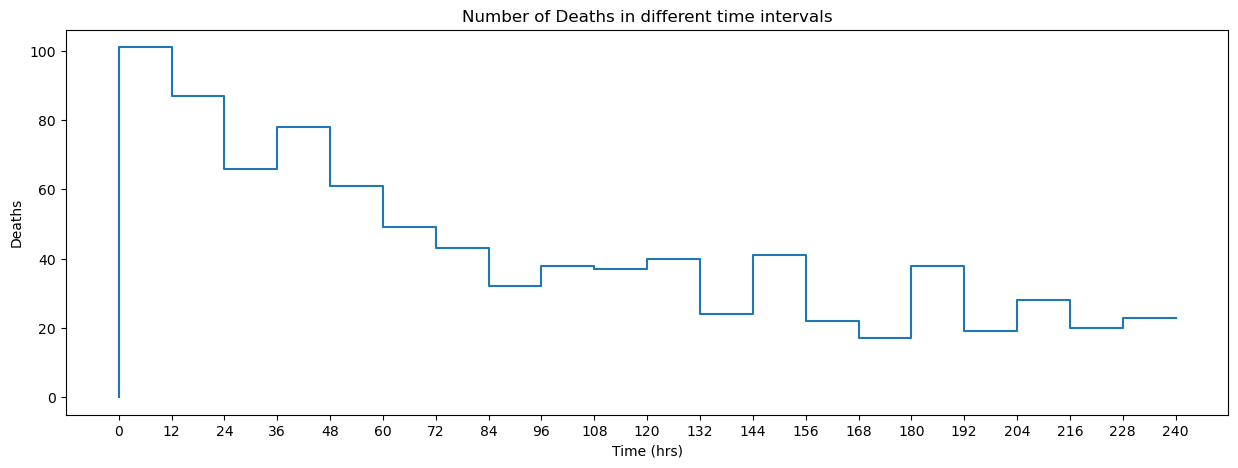

In [23]:
plt.figure(figsize= (15, 5))
plt.step(x= hrs_12, y= deaths_12)
plt.xticks(hrs_12)
plt.title('Number of Deaths in different time intervals')
plt.xlabel('Time (hrs)')
plt.ylabel('Deaths')

# MV Patients with time

In [5]:
os.path.dirname(os.getcwd())

'/N/project/waveform_mortality/rmahawar/waveform'

In [6]:
mv_time = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'db', 'MV_Mortality.csv'))
mv_time.head()

,SUBJECT_ID,INTIME,OUTTIME,VStart,VEndtime,deathtime,DEATH_T0,DEATH_MV
0,543,2148-12-13 19:41:49.000000 UTC,2148-12-17 19:45:40.000000 UTC,2148-12-13 22:00:00.000000 UTC,2148-12-15 08:00:00.000000 UTC,NaN,999999,999999
1,1049,2118-09-04 14:22:40.000000 UTC,2118-09-10 12:42:22.000000 UTC,2118-09-04 20:00:00.000000 UTC,2118-09-09 07:00:00.000000 UTC,2118-09-10 11:25:00.000000 UTC,141,135
2,1501,2146-12-11 14:05:45.000000 UTC,2146-12-19 15:18:01.000000 UTC,2146-12-15 20:20:00.000000 UTC,2146-12-16 12:04:00.000000 UTC,NaN,999999,999999
3,2187,2134-06-30 23:21:18.000000 UTC,2134-07-02 17:52:28.000000 UTC,2134-07-02 14:15:00.000000 UTC,2134-07-02 15:00:00.000000 UTC,NaN,999999,999999
4,1855,2124-05-19 08:12:58.000000 UTC,2124-05-21 10:02:57.000000 UTC,2124-05-19 21:00:00.000000 UTC,2124-05-21 00:15:00.000000 UTC,2124-05-21 05:00:00.000000 UTC,45,32


In [8]:
deaths_6, hrs_6 = create_death_distribution(mv_time, 1, 'DEATH_MV', range_= 48)

Text(0, 0.5, 'Deaths')

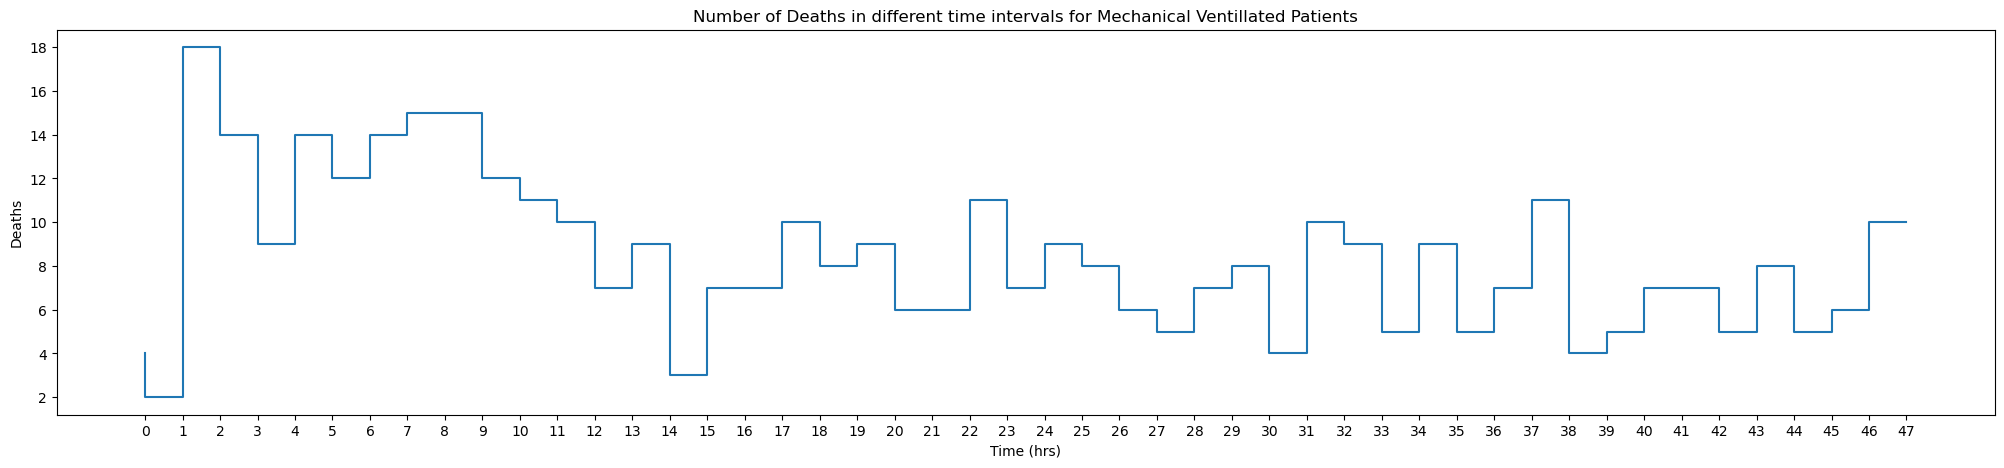

In [11]:
plt.figure(figsize= (25, 5))
plt.step(x= hrs_6, y= deaths_6)
plt.xticks(hrs_6)
plt.title('Number of Deaths in different time intervals for Mechanical Ventillated Patients')
plt.xlabel('Time (hrs)')
plt.ylabel('Deaths')

In [13]:
cum_deaths = np.cumsum(deaths_6)

Text(0, 0.5, 'Deaths')

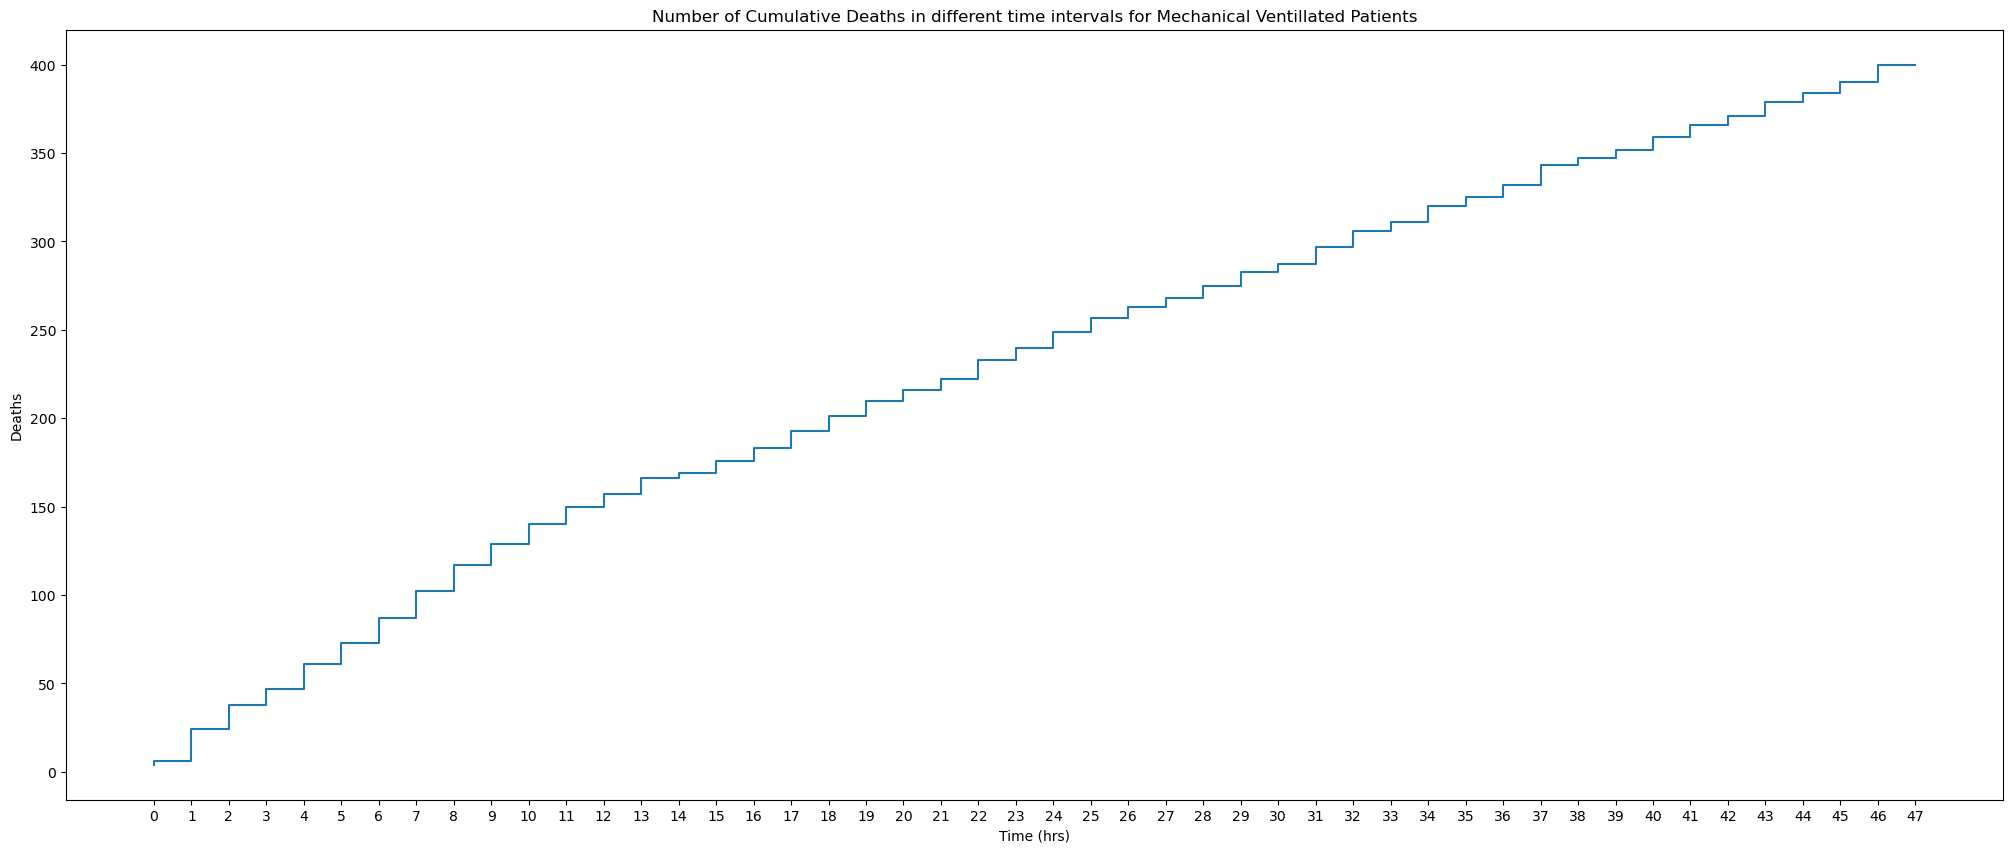

In [17]:
plt.figure(figsize= (25, 10))
plt.step(x= hrs_6, y= cum_deaths)
plt.xticks(hrs_6)
plt.title('Number of Cumulative Deaths in different time intervals for Mechanical Ventillated Patients')
plt.xlabel('Time (hrs)')
plt.ylabel('Deaths')

In [10]:
snap_ = create_snapshot(mv_time, 6, 12, 'DEATH_MV')

In [11]:
len(snap_)

4926

In [12]:
snap_.head()

,SUBJECT_ID,INTIME,OUTTIME,VStart,VEndtime,deathtime,DEATH_T0,DEATH_MV,label
0,543,2148-12-13 19:41:49.000000 UTC,2148-12-17 19:45:40.000000 UTC,2148-12-13 22:00:00.000000 UTC,2148-12-15 08:00:00.000000 UTC,NaN,999999,999999,0
1,1049,2118-09-04 14:22:40.000000 UTC,2118-09-10 12:42:22.000000 UTC,2118-09-04 20:00:00.000000 UTC,2118-09-09 07:00:00.000000 UTC,2118-09-10 11:25:00.000000 UTC,141,135,0
2,1501,2146-12-11 14:05:45.000000 UTC,2146-12-19 15:18:01.000000 UTC,2146-12-15 20:20:00.000000 UTC,2146-12-16 12:04:00.000000 UTC,NaN,999999,999999,0
3,2187,2134-06-30 23:21:18.000000 UTC,2134-07-02 17:52:28.000000 UTC,2134-07-02 14:15:00.000000 UTC,2134-07-02 15:00:00.000000 UTC,NaN,999999,999999,0
4,1855,2124-05-19 08:12:58.000000 UTC,2124-05-21 10:02:57.000000 UTC,2124-05-19 21:00:00.000000 UTC,2124-05-21 00:15:00.000000 UTC,2124-05-21 05:00:00.000000 UTC,45,32,0


In [13]:
len(snap_[snap_['label'] == 1])

77

In [14]:
snap_.to_csv('Cohort.csv', index= False)

# MV Duration Distribution

In [2]:
mv_time = pd.read_csv('MV_Mortality.csv')
mv_time.head()

,SUBJECT_ID,INTIME,OUTTIME,VStart,VEndtime,deathtime,DEATH_T0,DEATH_MV
0,543,2148-12-13 19:41:49.000000 UTC,2148-12-17 19:45:40.000000 UTC,2148-12-13 22:00:00.000000 UTC,2148-12-15 08:00:00.000000 UTC,NaN,999999,999999
1,1049,2118-09-04 14:22:40.000000 UTC,2118-09-10 12:42:22.000000 UTC,2118-09-04 20:00:00.000000 UTC,2118-09-09 07:00:00.000000 UTC,2118-09-10 11:25:00.000000 UTC,141,135
2,1501,2146-12-11 14:05:45.000000 UTC,2146-12-19 15:18:01.000000 UTC,2146-12-15 20:20:00.000000 UTC,2146-12-16 12:04:00.000000 UTC,NaN,999999,999999
3,2187,2134-06-30 23:21:18.000000 UTC,2134-07-02 17:52:28.000000 UTC,2134-07-02 14:15:00.000000 UTC,2134-07-02 15:00:00.000000 UTC,NaN,999999,999999
4,1855,2124-05-19 08:12:58.000000 UTC,2124-05-21 10:02:57.000000 UTC,2124-05-19 21:00:00.000000 UTC,2124-05-21 00:15:00.000000 UTC,2124-05-21 05:00:00.000000 UTC,45,32


In [14]:
len(mv_time)

5003

In [5]:
mv_length = []

for i in range(len(mv_time)):
    start = mv_time.loc[i]['VStart']
    end = mv_time.loc[i]['VEndtime']
    start = datetime.strptime(start, '%Y-%m-%d %H:%M:%S.%f %Z')
    end = datetime.strptime(end, '%Y-%m-%d %H:%M:%S.%f %Z')
    mv_length.append((end - start).total_seconds()/3600)

Text(0.5, 0, 'Time')

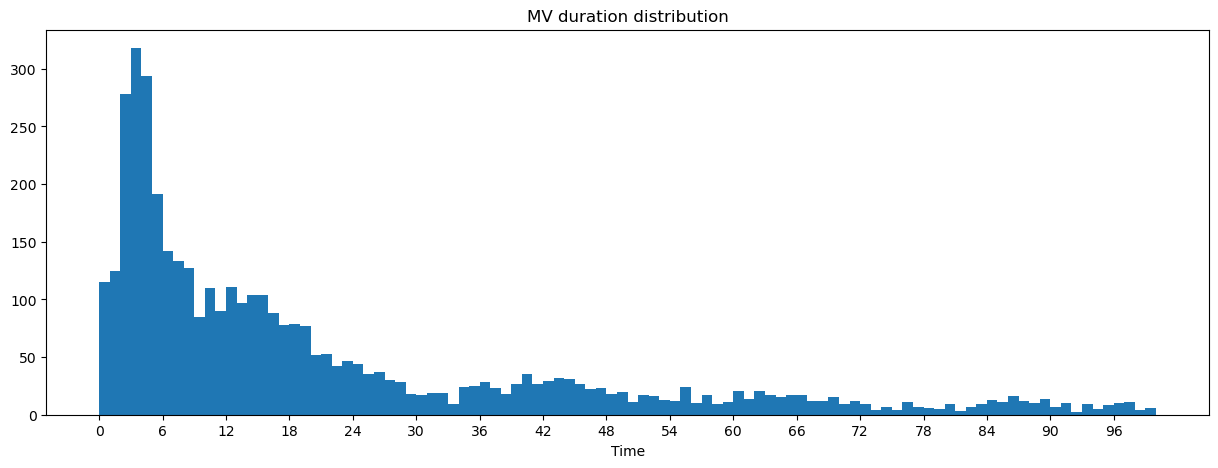

In [13]:
plt.figure(figsize= (15, 5))
plt.hist(mv_length, bins= 100, range= (0, 100))
plt.xticks([i for i in range(100) if i % 6 == 0])
plt.title('MV duration distribution')
plt.xlabel('Time')

# Z Analysis

In [18]:
mv_time = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'db', 'MV_Mortality.csv'))
mv_time.head()

,SUBJECT_ID,INTIME,OUTTIME,VStart,VEndtime,deathtime,DEATH_T0,DEATH_MV
0,543,2148-12-13 19:41:49.000000 UTC,2148-12-17 19:45:40.000000 UTC,2148-12-13 22:00:00.000000 UTC,2148-12-15 08:00:00.000000 UTC,NaN,999999,999999
1,1049,2118-09-04 14:22:40.000000 UTC,2118-09-10 12:42:22.000000 UTC,2118-09-04 20:00:00.000000 UTC,2118-09-09 07:00:00.000000 UTC,2118-09-10 11:25:00.000000 UTC,141,135
2,1501,2146-12-11 14:05:45.000000 UTC,2146-12-19 15:18:01.000000 UTC,2146-12-15 20:20:00.000000 UTC,2146-12-16 12:04:00.000000 UTC,NaN,999999,999999
3,2187,2134-06-30 23:21:18.000000 UTC,2134-07-02 17:52:28.000000 UTC,2134-07-02 14:15:00.000000 UTC,2134-07-02 15:00:00.000000 UTC,NaN,999999,999999
4,1855,2124-05-19 08:12:58.000000 UTC,2124-05-21 10:02:57.000000 UTC,2124-05-19 21:00:00.000000 UTC,2124-05-21 00:15:00.000000 UTC,2124-05-21 05:00:00.000000 UTC,45,32


In [20]:
def create_z_distribution(df, zend = 'VStart', zstart = 'INTIME'):
    mv_time = df
    z_mvs_icu_pos = []
    z_mvs_icu_neg = []

    for i in range(len(mv_time)):
        row = mv_time.loc[i]
        icu_in = datetime.strptime(row[zstart], '%Y-%m-%d %H:%M:%S.%f %Z')
        mv_s = datetime.strptime(row[zend], '%Y-%m-%d %H:%M:%S.%f %Z')
        if mv_s > icu_in:
            delta= (mv_s - icu_in).total_seconds()/3600
            z_mvs_icu_pos.append(delta)
        else:
            delta = (icu_in - mv_s).total_seconds()/3600
            z_mvs_icu_neg.append(delta)
    
    return z_mvs_icu_pos, z_mvs_icu_neg

In [21]:
z_mvs_icu_pos, z_mvs_icu_neg = create_z_distribution(mv_time, )
len(z_mvs_icu_neg), len(z_mvs_icu_pos)

(500, 4503)

In [34]:
z_mvs_icu_pos_sorted = sorted(z_mvs_icu_pos)[:3000]

In [37]:
np.median(z_mvs_icu_pos)

3.4272222222222224

In [35]:
min(z_mvs_icu_pos_sorted), max(z_mvs_icu_pos_sorted)

(0.001388888888888889, 8.85388888888889)

Text(0.5, -0.15, 'Z = (MV start time) - (ICU in time)')

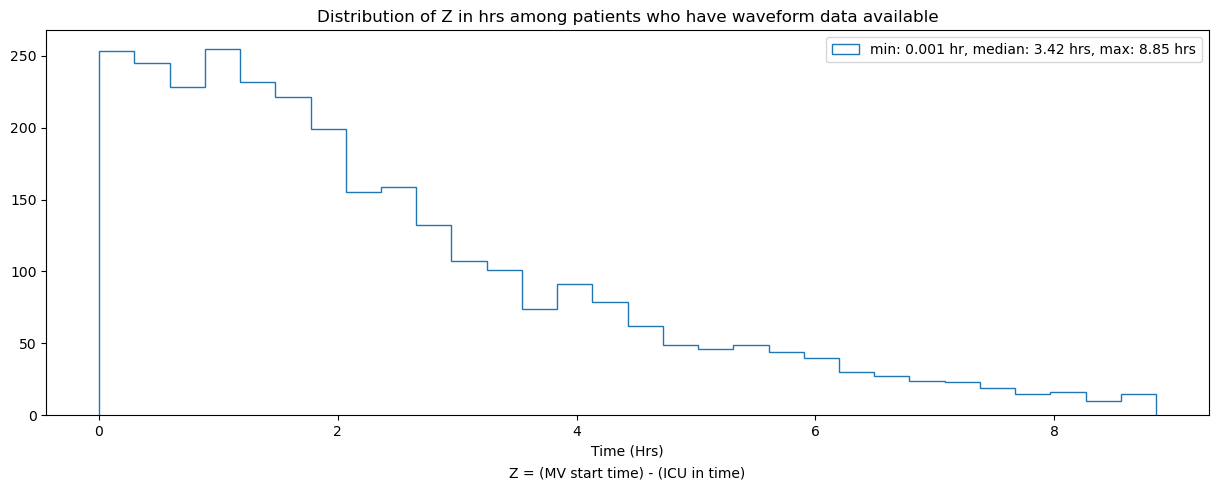

In [45]:
plt.figure(figsize= (15, 5),)
plt.hist(z_mvs_icu_pos_sorted, bins= 30, histtype= 'step', label = 'min: 0.001 hr, median: 3.42 hrs, max: 8.85 hrs')
# sns.histplot(z_mvs_icu_pos_sorted, kde=False, color='skyblue',)
plt.legend()
plt.title('Distribution of Z in hrs among patients who have waveform data available')
plt.xlabel('Time (Hrs)')
caption = "Z = (MV start time) - (ICU in time)"
plt.text(0.5, -0.15, caption, ha='center', va='center', transform=plt.gca().transAxes)


In [30]:
z_mvs_icu_pos_sorted_cum = np.cumsum(z_mvs_icu_pos_sorted)

In [ ]:
np.median(np.array(z_mvs_icu_pos))

3.4272222222222224

In [ ]:
min(z_mvs_icu_neg), max(z_mvs_icu_neg)

(0.0, 7.463055555555556)